In [ ]:
from expansion_tools.blob_expansion_tools_jetset import *
from processing.fix_numba_issue import load_model

from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED


## Notebook to run the simulations with only adiabatic cooling, necessary for the analysis in Section 5.1

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))
fit_model=load_model()

In [3]:
rest_frame='obs'
delta_t_out=1E3
t_exp=0

## loading flaring state simulation

In [4]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val

def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))

beta_exp=np.logspace(-3,np.log10(0.3),10)



Set `run=False` if you have already run the simulations, and you want only to regenerate lcs or SEDs

In [5]:
run=True
for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_change_beta_no_synch_cooling',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp,
                      synch_cooling_off=True,
                      cache_SEDs_rad=True,
                      m_B=1)
    
   
    print('----------------------------------------------')

ID 0
beta_exp 0.001000
delta_t  est. 1.929012e+03 (d)
t_dec  est. 1.929012e+03 (d)
delta_t  est. 1.666667e+08 (s)
t_dec  est. 1.666667e+08 (s)
duration 1.833333e+09
T_SIZE 1833333
NUM_SET 5000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/1833333 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 1833333343.3333333
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=2.039e+08, R2=1.11118e+16 t/t_ref=203703704.704 t/t_exp=203703704.704 t/duration=0.111 1.00002e+00
t1=000 t2=1111, t2_R=4.077e+08, R2=1.72236e+16 t/t_ref=407407409.407 t/t_exp=407407409.407 t/duration=0.222 1.00002e+00
t1=000 t2=1666, t2_R=6.112e+08, R2=2.33243e+16 t/t_ref=611111114.111 t/t_exp=611111114.111 t/duration=0.333 9.99882e-01
t1=000 t2=2222, t2_R=8.151e+08, R2=2.94361e+16 t/t_ref=814814818.815 t/t_exp=814814818.815 t/duration=0.445 9.98566e-01
t1=000 t2=2777, t2_R=1.019e+09, R2=3.55369e+16 t/t_ref=1018518523.519 t/t_exp=1018518523.519 t/duration=0.556 9.91625e-01
t1=000 t2=3333, t2_R=1.222e+09, R2=4.16486e+16 t/t_ref=1222222228.222 t/t_exp=1222222228.222 t/duration=0.667 9.71756e-01
t1=000 t2=3888, t2_R=1.426e+09, R2=4.77494e+16 t/t_ref=1425925932.926 t/t_exp=1425925932.926 t/durati

  0%|          | 0/972760 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 972760090.0696834
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=1.082e+08, R2=1.11118e+16 t/t_ref=108084454.341 t/t_exp=108084454.341 t/duration=0.111 1.00004e+00
t1=000 t2=1111, t2_R=2.163e+08, R2=1.72235e+16 t/t_ref=216168908.682 t/t_exp=216168908.682 t/duration=0.222 1.00004e+00
t1=000 t2=1666, t2_R=3.243e+08, R2=2.33244e+16 t/t_ref=324253363.023 t/t_exp=324253363.023 t/duration=0.333 9.99907e-01
t1=000 t2=2222, t2_R=4.325e+08, R2=2.94361e+16 t/t_ref=432337817.364 t/t_exp=432337817.364 t/duration=0.445 9.98592e-01
t1=000 t2=2777, t2_R=5.405e+08, R2=3.55369e+16 t/t_ref=540422271.705 t/t_exp=540422271.705 t/duration=0.556 9.91652e-01
t1=000 t2=3333, t2_R=6.486e+08, R2=4.16487e+16 t/t_ref=648506726.046 t/t_exp=648506726.046 t/duration=0.667 9.71784e-01
t1=000 t2=3888, t2_R=7.566e+08, R2=4.77494e+16 t/t_ref=756591180.388 t/t_exp=756591180.388 t/duration=0.77

  0%|          | 0/516143 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 516143013.66027755
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=5.740e+07, R2=1.11119e+16 t/t_ref=57349223.629 t/t_exp=57349223.629 t/duration=0.111 1.00007e+00
t1=000 t2=1111, t2_R=1.148e+08, R2=1.72236e+16 t/t_ref=114698447.258 t/t_exp=114698447.258 t/duration=0.222 1.00008e+00
t1=000 t2=1666, t2_R=1.721e+08, R2=2.33244e+16 t/t_ref=172047670.887 t/t_exp=172047670.887 t/duration=0.333 9.99954e-01
t1=000 t2=2222, t2_R=2.295e+08, R2=2.94362e+16 t/t_ref=229396894.516 t/t_exp=229396894.516 t/duration=0.445 9.98642e-01
t1=000 t2=2777, t2_R=2.868e+08, R2=3.55370e+16 t/t_ref=286746118.145 t/t_exp=286746118.145 t/duration=0.556 9.91703e-01
t1=000 t2=3333, t2_R=3.442e+08, R2=4.16487e+16 t/t_ref=344095341.774 t/t_exp=344095341.774 t/duration=0.667 9.71837e-01
t1=000 t2=3888, t2_R=4.015e+08, R2=4.77495e+16 t/t_ref=401444565.402 t/t_exp=401444565.402 t/duration=0.778

  0%|          | 0/273863 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 273863633.40071553
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=3.045e+07, R2=1.11119e+16 t/t_ref=30429292.489 t/t_exp=30429292.489 t/duration=0.111 1.00013e+00
t1=000 t2=1111, t2_R=6.091e+07, R2=1.72237e+16 t/t_ref=60858584.978 t/t_exp=60858584.978 t/duration=0.222 1.00016e+00
t1=000 t2=1666, t2_R=9.131e+07, R2=2.33243e+16 t/t_ref=91287877.467 t/t_exp=91287877.467 t/duration=0.333 1.00004e+00
t1=000 t2=2222, t2_R=1.218e+08, R2=2.94362e+16 t/t_ref=121717169.956 t/t_exp=121717169.956 t/duration=0.445 9.98735e-01
t1=000 t2=2777, t2_R=1.522e+08, R2=3.55370e+16 t/t_ref=152146462.445 t/t_exp=152146462.445 t/duration=0.556 9.91799e-01
t1=000 t2=3333, t2_R=1.826e+08, R2=4.16487e+16 t/t_ref=182575754.934 t/t_exp=182575754.934 t/duration=0.667 9.71938e-01
t1=000 t2=3888, t2_R=2.130e+08, R2=4.77495e+16 t/t_ref=213005047.423 t/t_exp=213005047.423 t/duration=0.778 9.3

  0%|          | 0/145311 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 145311064.6695201
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=1.616e+07, R2=1.11119e+16 t/t_ref=16145673.741 t/t_exp=16145673.741 t/duration=0.111 1.00025e+00
t1=000 t2=1111, t2_R=3.232e+07, R2=1.72239e+16 t/t_ref=32291347.482 t/t_exp=32291347.482 t/duration=0.222 1.00031e+00
t1=000 t2=1666, t2_R=4.845e+07, R2=2.33244e+16 t/t_ref=48437021.223 t/t_exp=48437021.223 t/duration=0.333 1.00021e+00
t1=000 t2=2222, t2_R=6.461e+07, R2=2.94364e+16 t/t_ref=64582694.964 t/t_exp=64582694.964 t/duration=0.445 9.98911e-01
t1=000 t2=2777, t2_R=8.074e+07, R2=3.55369e+16 t/t_ref=80728368.705 t/t_exp=80728368.705 t/duration=0.556 9.91980e-01
t1=000 t2=3333, t2_R=9.689e+07, R2=4.16489e+16 t/t_ref=96874042.446 t/t_exp=96874042.446 t/duration=0.667 9.72126e-01
t1=000 t2=3888, t2_R=1.130e+08, R2=4.77494e+16 t/t_ref=113019716.187 t/t_exp=113019716.187 t/duration=0.778 9.38436e-0

  0%|          | 0/77101 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 77101533.55018133
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=8.574e+06, R2=1.11120e+16 t/t_ref=8566836.950 t/t_exp=8566836.950 t/duration=0.111 1.00047e+00
t1=000 t2=1111, t2_R=1.715e+07, R2=1.72241e+16 t/t_ref=17133673.900 t/t_exp=17133673.900 t/duration=0.222 1.00060e+00
t1=000 t2=1666, t2_R=2.571e+07, R2=2.33247e+16 t/t_ref=25700510.850 t/t_exp=25700510.850 t/duration=0.333 1.00053e+00
t1=000 t2=2222, t2_R=3.428e+07, R2=2.94367e+16 t/t_ref=34267347.800 t/t_exp=34267347.800 t/duration=0.445 9.99243e-01
t1=000 t2=2777, t2_R=4.284e+07, R2=3.55374e+16 t/t_ref=42834184.750 t/t_exp=42834184.750 t/duration=0.556 9.92321e-01
t1=000 t2=3333, t2_R=5.141e+07, R2=4.16487e+16 t/t_ref=51401021.700 t/t_exp=51401021.700 t/duration=0.667 9.72483e-01
t1=000 t2=3888, t2_R=5.997e+07, R2=4.77500e+16 t/t_ref=59967858.650 t/t_exp=59967858.650 t/duration=0.778 9.38812e-01
t1

  0%|          | 0/40909 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 40909801.39391035
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=4.550e+06, R2=1.11130e+16 t/t_ref=4545533.377 t/t_exp=4545533.377 t/duration=0.111 1.00089e+00
t1=000 t2=1111, t2_R=9.099e+06, R2=1.72247e+16 t/t_ref=9091066.754 t/t_exp=9091066.754 t/duration=0.222 1.00114e+00
t1=000 t2=1666, t2_R=1.364e+07, R2=2.33256e+16 t/t_ref=13636600.131 t/t_exp=13636600.131 t/duration=0.333 1.00112e+00
t1=000 t2=2222, t2_R=1.819e+07, R2=2.94372e+16 t/t_ref=18182133.508 t/t_exp=18182133.508 t/duration=0.445 9.99869e-01
t1=000 t2=2777, t2_R=2.273e+07, R2=3.55382e+16 t/t_ref=22727666.886 t/t_exp=22727666.886 t/duration=0.556 9.92963e-01
t1=000 t2=3333, t2_R=2.728e+07, R2=4.16498e+16 t/t_ref=27273200.263 t/t_exp=27273200.263 t/duration=0.667 9.73150e-01
t1=000 t2=3888, t2_R=3.182e+07, R2=4.77507e+16 t/t_ref=31818733.640 t/t_exp=31818733.640 t/duration=0.778 9.39521e-01
t1=0

  0%|          | 0/21706 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 21706598.3374405
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=2.414e+06, R2=1.11125e+16 t/t_ref=2411844.149 t/t_exp=2411844.149 t/duration=0.111 1.00167e+00
t1=000 t2=1111, t2_R=4.828e+06, R2=1.72250e+16 t/t_ref=4823688.297 t/t_exp=4823688.297 t/duration=0.222 1.00215e+00
t1=000 t2=1666, t2_R=7.237e+06, R2=2.33249e+16 t/t_ref=7235532.446 t/t_exp=7235532.446 t/duration=0.333 1.00224e+00
t1=000 t2=2222, t2_R=9.651e+06, R2=2.94374e+16 t/t_ref=9647376.594 t/t_exp=9647376.594 t/duration=0.445 1.00105e+00
t1=000 t2=2777, t2_R=1.206e+07, R2=3.55372e+16 t/t_ref=12059220.743 t/t_exp=12059220.743 t/duration=0.556 9.94178e-01
t1=000 t2=3333, t2_R=1.447e+07, R2=4.16498e+16 t/t_ref=14471064.892 t/t_exp=14471064.892 t/duration=0.667 9.74418e-01
t1=000 t2=3888, t2_R=1.688e+07, R2=4.77496e+16 t/t_ref=16882909.040 t/t_exp=16882909.040 t/duration=0.778 9.40875e-01
t1=000 t2

  0%|          | 0/11517 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 11517447.786819056
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=1.281e+06, R2=1.11133e+16 t/t_ref=1279716.310 t/t_exp=1279716.310 t/duration=0.111 1.00315e+00
t1=000 t2=1111, t2_R=2.562e+06, R2=1.72265e+16 t/t_ref=2559432.619 t/t_exp=2559432.619 t/duration=0.222 1.00406e+00
t1=000 t2=1666, t2_R=3.840e+06, R2=2.33254e+16 t/t_ref=3839148.929 t/t_exp=3839148.929 t/duration=0.333 1.00435e+00
t1=000 t2=2222, t2_R=5.121e+06, R2=2.94387e+16 t/t_ref=5118865.239 t/t_exp=5118865.239 t/duration=0.445 1.00327e+00
t1=000 t2=2777, t2_R=6.399e+06, R2=3.55376e+16 t/t_ref=6398581.548 t/t_exp=6398581.548 t/duration=0.556 9.96468e-01
t1=000 t2=3333, t2_R=7.680e+06, R2=4.16509e+16 t/t_ref=7678297.858 t/t_exp=7678297.858 t/duration=0.667 9.76804e-01
t1=000 t2=3888, t2_R=8.958e+06, R2=4.77498e+16 t/t_ref=8958014.168 t/t_exp=8958014.168 t/duration=0.778 9.43412e-01
t1=000 t2=444

  0%|          | 0/6111 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/4999 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 6111121.111111112
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=6.800e+05, R2=1.11159e+16 t/t_ref=679013.346 t/t_exp=679013.346 t/duration=0.111 1.00594e+00
t1=000 t2=1110, t2_R=1.358e+06, R2=1.72138e+16 t/t_ref=1358026.691 t/t_exp=1358026.691 t/duration=0.222 1.00766e+00
t1=000 t2=1666, t2_R=2.038e+06, R2=2.33297e+16 t/t_ref=2037040.037 t/t_exp=2037040.037 t/duration=0.333 1.00834e+00
t1=000 t2=2221, t2_R=2.716e+06, R2=2.94276e+16 t/t_ref=2716053.383 t/t_exp=2716053.383 t/duration=0.444 1.00748e+00
t1=000 t2=2777, t2_R=3.396e+06, R2=3.55435e+16 t/t_ref=3395066.728 t/t_exp=3395066.728 t/duration=0.556 1.00078e+00
t1=000 t2=3332, t2_R=4.074e+06, R2=4.16414e+16 t/t_ref=4074080.074 t/t_exp=4074080.074 t/duration=0.667 9.81360e-01
t1=000 t2=3888, t2_R=4.754e+06, R2=4.77572e+16 t/t_ref=4753093.420 t/t_exp=4753093.420 t/duration=0.778 9.48155e-01
t1=000 t2=4443, 

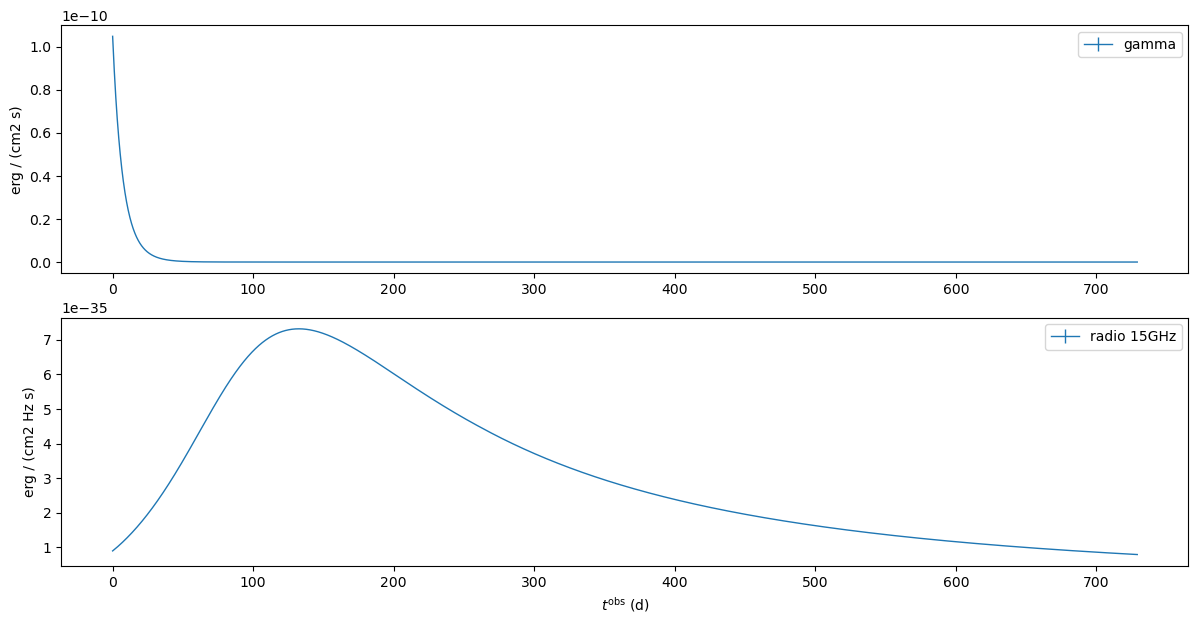

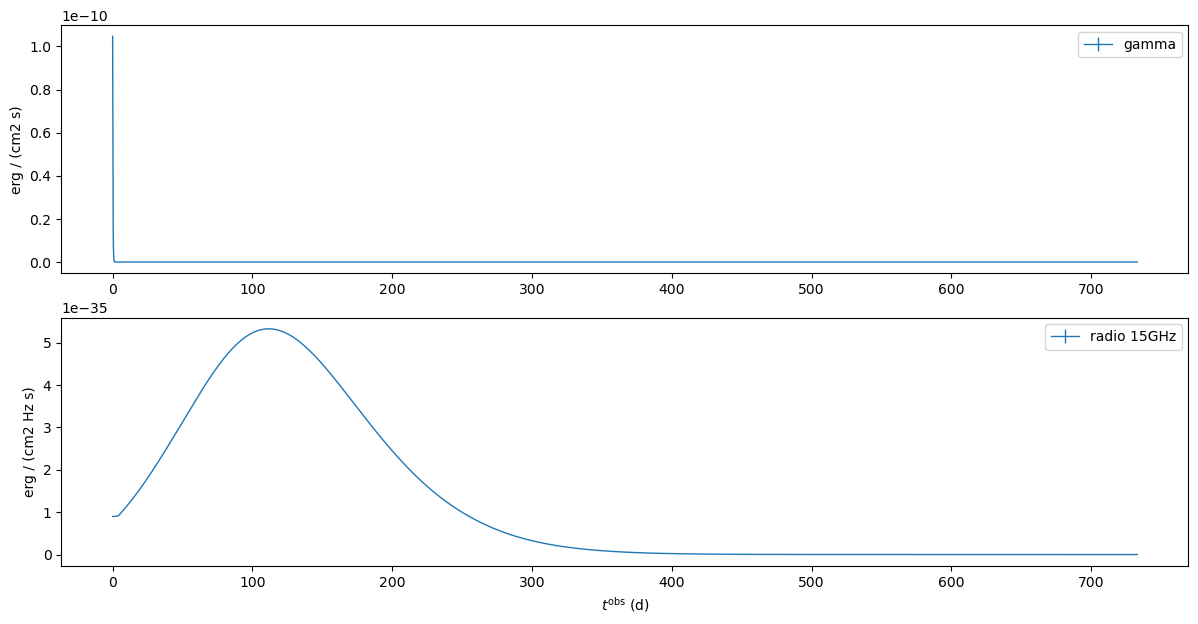

In [6]:
from expansion_tools.delay_analysis import plot_lcs

d=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta_no_synch_cooling/lc_obs_beta_exp=0.001.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)
f=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.001.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)

In [7]:
beta_exp=[0.1]
for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_beta_0.1_no_sync_cooling',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp,
                      synch_cooling_off=True,
                      cache_SEDs_rad=True,
                      m_B=1)
    
    
   
    print('----------------------------------------------')    

ID 0
beta_exp 0.100000
delta_t  est. 1.929012e+01 (d)
t_dec  est. 1.929014e+01 (d)
delta_t  est. 1.666667e+06 (s)
t_dec  est. 1.666668e+06 (s)
duration 1.833334e+07
T_SIZE 18333
NUM_SET 5000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/18333 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
1.0 1.0 18333343.333333332
t1=000 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00000e+00
t1=000 t2=555, t2_R=2.039e+06, R2=1.11129e+16 t/t_ref=2037038.037 t/t_exp=2037038.037 t/duration=0.111 1.00198e+00
t1=000 t2=1111, t2_R=4.078e+06, R2=1.72258e+16 t/t_ref=4074076.074 t/t_exp=4074076.074 t/duration=0.222 1.00255e+00
t1=000 t2=1666, t2_R=6.113e+06, R2=2.33267e+16 t/t_ref=6111114.111 t/t_exp=6111114.111 t/duration=0.333 1.00268e+00
t1=000 t2=2222, t2_R=8.151e+06, R2=2.94365e+16 t/t_ref=8148152.148 t/t_exp=8148152.148 t/duration=0.445 1.00151e+00
t1=000 t2=2777, t2_R=1.019e+07, R2=3.55374e+16 t/t_ref=10185190.185 t/t_exp=10185190.185 t/duration=0.556 9.94654e-01
t1=000 t2=3333, t2_R=1.223e+07, R2=4.16503e+16 t/t_ref=12222228.222 t/t_exp=12222228.222 t/duration=0.667 9.74912e-01
t1=000 t2=3888, t2_R=1.426e+07, R2=4.77512e+16 t/t_ref=14259266.259 t/t_exp=14259266.259 t/duration=0.778 9.41392e-01
t1=000 